In [4]:
import numpy as np
from scipy.stats import ttest_1samp, ttest_ind, mannwhitneyu, levene, shapiro,bartlett,wilcoxon
from statsmodels.stats.power import ttest_power
import pandas as pd
%matplotlib inline

In [2]:
A=pd.read_table('HR (1).txt',index_col=0)

In [3]:
A.head()

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Individual,,,,,,,,,,,,,,,,,,,,,
Ind1,Yes,41,1,1102,1,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
Ind2,No,49,2,279,2,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
Ind3,Yes,37,1,1373,2,2,2,6,1,4,...,2,80,0,7,3,3,0,0,0,0
Ind4,No,33,2,1392,2,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
Ind5,No,27,1,591,2,2,1,2,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
A.columns

Index(['Attrition', 'Age', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [7]:
A_gender= A.groupby('Gender')
A1=A_gender.get_group(1)  #male
A2=A_gender.get_group(2)  #female

In [11]:
#unpaired test
G1=np.array(A1['MonthlyIncome'])
G2=np.array(A2['MonthlyIncome'])


In [12]:
type(G1)

numpy.ndarray

In [13]:
#check for normality
shapiro(G1)

(0.8169718384742737, 1.709933327621381e-30)

In [14]:
#both groups are not normal
#thats why we do bartlett test
bartlett(G1,G2)

BartlettResult(statistic=0.01177553932613755, pvalue=0.9135870578638189)

In [17]:
u, p_value = mannwhitneyu(G1,G2)
print(p_value)

0.044208341633010594


In [22]:
delta=(np.mean(G1) - np.mean(G2)) / np.sqrt(((882-1)*np.var(G1)+(588-1)*np.var(G2)) / 882+588-2)
delta

-0.050432169461926656

In [29]:
print(ttest_power(delta, nobs=n1+n2, alpha=0.05, alternative='two-sided'))

0.48902844548799007


In [25]:
n1=len(G1)
n2=len(G2)

In [ ]:
#conclusion is that there is a marginal difference between the male and female

In [30]:
A_gender= A.groupby('Gender')
A1=A_gender.get_group(1)  #male
A2=A_gender.get_group(2)

In [36]:
A_G1=np.array(A1['Age'])
A_G2=np.array(A2['Age'])

In [37]:
shapiro(A_G1)

(0.9764998555183411, 1.0052821075579033e-10)

In [38]:
shapiro(A_G2)

(0.9777933955192566, 8.791240446726079e-08)

In [39]:
bartlett(A_G1,A_G2)

BartlettResult(statistic=0.422012236288481, pvalue=0.5159346814718807)

In [40]:
u, p_value = mannwhitneyu(A_G1,A_G2)
print(p_value)

0.08331979343883855


In [ ]:
#since p_val>0.05, it fails to reject H0,implies =>

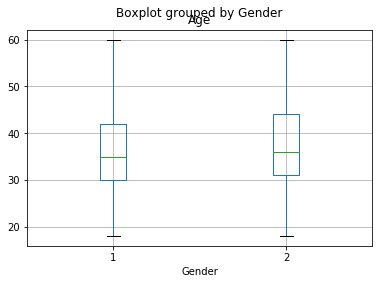

In [42]:
A.boxplot(column='Age',by='Gender')

AttributeError: 'numpy.ndarray' object has no attribute 'describe'

In [3]:
#food packet mean wght 125 gm with sd = 15.5 gms, what is the chance that customer get a pack
#less than 100 gms and getting a pack above 135 gms
#calculate z score
z= (100-125)/15.5
z

-1.6129032258064515

In [6]:
#calculate the probability (area under cureve) in standard normal distribution
import scipy.stats as stats
stats.norm.cdf(z) #5.3% chances of getting packet less than 100 gm

0.05338276713404089

In [11]:
z_1=(135-125)/15.5
z_1

0.6451612903225806

In [13]:
1-stats.norm.cdf(z_1) #25.9% chance of getting a pack greater than 

0.25941133433509533

In [14]:
#calculate for >123 $ <128 gms
z2 = (123-125)/15.5
z2

-0.12903225806451613

In [25]:
xunits=stats.norm.cdf(z2)
xunits

0.448666061968402

In [21]:
z3 = (128-125)/15.5

In [26]:
yunits=stats.norm.cdf(z3)
yunits

0.5767352425179979

In [24]:
auc = yunits-xunits
auc          #12.8% chance that we pick a perfect weight packet which is very low

0.12806918054959593